<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Data-load" data-toc-modified-id="Data-load-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data load</a></span></li><li><span><a href="#Data-Preprocessing-(Encoding)" data-toc-modified-id="Data-Preprocessing-(Encoding)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preprocessing (Encoding)</a></span><ul class="toc-item"><li><span><a href="#Label-Encoder" data-toc-modified-id="Label-Encoder-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Label Encoder</a></span></li><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>One Hot Encoding</a></span></li></ul></li><li><span><a href="#Correlation-heatmap" data-toc-modified-id="Correlation-heatmap-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation heatmap</a></span></li><li><span><a href="#Exporting-encoded-dataset" data-toc-modified-id="Exporting-encoded-dataset-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exporting encoded dataset</a></span></li></ul></div>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
pd.set_option('display.max_columns', None)

# Functions

In [18]:
def correlation_heatmap(dataframe):
    '''
    This function takes a dataframe as input and draws a heatmap with its correlations.
    '''

    sns.set(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(30, 30))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(dataframe.corr(), mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

    plt.show()

# Data load

We will be using the clean dataset for encoding:

In [19]:
data = pd.read_csv('../data/clean_data.csv', sep=',', index_col=0)

In [20]:
data.shape

(26184, 17)

# Data Preprocessing (Encoding)

In this section, we will be preparing our data for modeling. We will convert our categorical features to numerical to be able to use them in modeling.

To start with, we will create a copy of our dataset (to not edit the original):

In [21]:
# Copy of the dataset for encoding

df_encoded = data.copy()

## Label Encoder

We will be using the Label Encoder for the features that have only two categories, meaning that we don't need to create additional columns to encode the values.

In [22]:
# Creating the instance of labelencoder
labelencoder = LabelEncoder()

# Assigning the columns
cols_label_enc = ['sex', 'newsletter', 'use_pickup_point', 'with_promotion', 'is_lead', 
                  'churned_1_month']

# Creating labels for the columns
for col in cols_label_enc:
    df_encoded[col] = labelencoder.fit_transform(df_encoded[col])

# Checking if our encoding generated any null values
df_encoded.isnull().values.any()

False

Let's check our dataframe after Label Encoder:

In [23]:
df_encoded.head()

,sex,master_channel,newsletter,registration_payment,use_pickup_point,churned_1_month,email_domain,with_promotion,is_lead,reg_year,days_from_first_click,age,box_satisfaction,reg_month,random,income_per_region,population_per_region
0,0,a,1,10.99,0,1,gc,1,1,2017,0.0,25.0,152.34,a,466,18707,6663394
1,0,f,1,10.99,0,1,gc,1,1,2017,0.0,26.5,152.34,a,764,18707,6663394
2,1,f,1,10.99,0,1,gc,1,0,2017,0.0,11.0,152.34,a,954,15251,316798
3,1,d,1,10.99,0,1,gc,1,0,2017,0.0,13.5,152.34,a,471,17102,7675217
4,1,d,1,10.99,0,0,gc,1,1,2017,0.0,18.0,152.34,a,657,13148,5003769


## One Hot Encoding

We will be using One Hot Encoder for features that have more than two categories, because of this, additional columns have to be created to be able to assign a numerical value for these features.

In [24]:
# Creating an object of the OneHotEncoder
ohe = ce.OneHotEncoder(cols=['master_channel', 'reg_month', 'email_domain'], use_cat_names=True)

# Encoding categorical variables
df_encoded = ohe.fit_transform(df_encoded)
df_encoded.head()

,sex,master_channel_a,master_channel_f,master_channel_d,master_channel_ps,master_channel_gb,master_channel_de,master_channel_g,master_channel_s,master_channel_e,master_channel_b,master_channel_dd,newsletter,registration_payment,use_pickup_point,churned_1_month,email_domain_gc,email_domain_hc,email_domain_yc,email_domain_he,email_domain_other,email_domain_ye,email_domain_lc,email_domain_mc,email_domain_ic,email_domain_ce,email_domain_oe,email_domain_ge,email_domain_oc,email_domain_ae,with_promotion,is_lead,reg_year,days_from_first_click,age,box_satisfaction,reg_month_a,reg_month_b,reg_month_c,reg_month_d,reg_month_e,reg_month_f,reg_month_g,reg_month_h,reg_month_i,reg_month_j,reg_month_k,reg_month_l,random,income_per_region,population_per_region
0,0,1,0,0,0,0,0,0,0,0,0,0,1,10.99,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2017,0.0,25.0,152.34,1,0,0,0,0,0,0,0,0,0,0,0,466,18707,6663394
1,0,0,1,0,0,0,0,0,0,0,0,0,1,10.99,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2017,0.0,26.5,152.34,1,0,0,0,0,0,0,0,0,0,0,0,764,18707,6663394
2,1,0,1,0,0,0,0,0,0,0,0,0,1,10.99,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2017,0.0,11.0,152.34,1,0,0,0,0,0,0,0,0,0,0,0,954,15251,316798
3,1,0,0,1,0,0,0,0,0,0,0,0,1,10.99,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2017,0.0,13.5,152.34,1,0,0,0,0,0,0,0,0,0,0,0,471,17102,7675217
4,1,0,0,1,0,0,0,0,0,0,0,0,1,10.99,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2017,0.0,18.0,152.34,1,0,0,0,0,0,0,0,0,0,0,0,657,13148,5003769


In [25]:
df_encoded.shape

(26184, 51)

Making sure that our data is fully encoded:

In [26]:
df_encoded.dtypes

sex                        int64
master_channel_a           int64
master_channel_f           int64
master_channel_d           int64
master_channel_ps          int64
master_channel_gb          int64
master_channel_de          int64
master_channel_g           int64
master_channel_s           int64
master_channel_e           int64
master_channel_b           int64
master_channel_dd          int64
newsletter                 int64
registration_payment     float64
use_pickup_point           int64
churned_1_month            int64
email_domain_gc            int64
email_domain_hc            int64
email_domain_yc            int64
email_domain_he            int64
email_domain_other         int64
email_domain_ye            int64
email_domain_lc            int64
email_domain_mc            int64
email_domain_ic            int64
email_domain_ce            int64
email_domain_oe            int64
email_domain_ge            int64
email_domain_oc            int64
email_domain_ae            int64
with_promo

# Correlation heatmap

Now that we have our data encoded, we can check the correlation between the features. We have 51 features, to properly evaluate the correlation (especially to the target feature) we will divide the dataset to 3 sets:

In [32]:
col1 = list(df_encoded.columns)[:16]+['with_promotion']
col2 = list(df_encoded.columns)[16:32]+['churned_1_month']
col3 = list(df_encoded.columns)[32:51]+['churned_1_month']

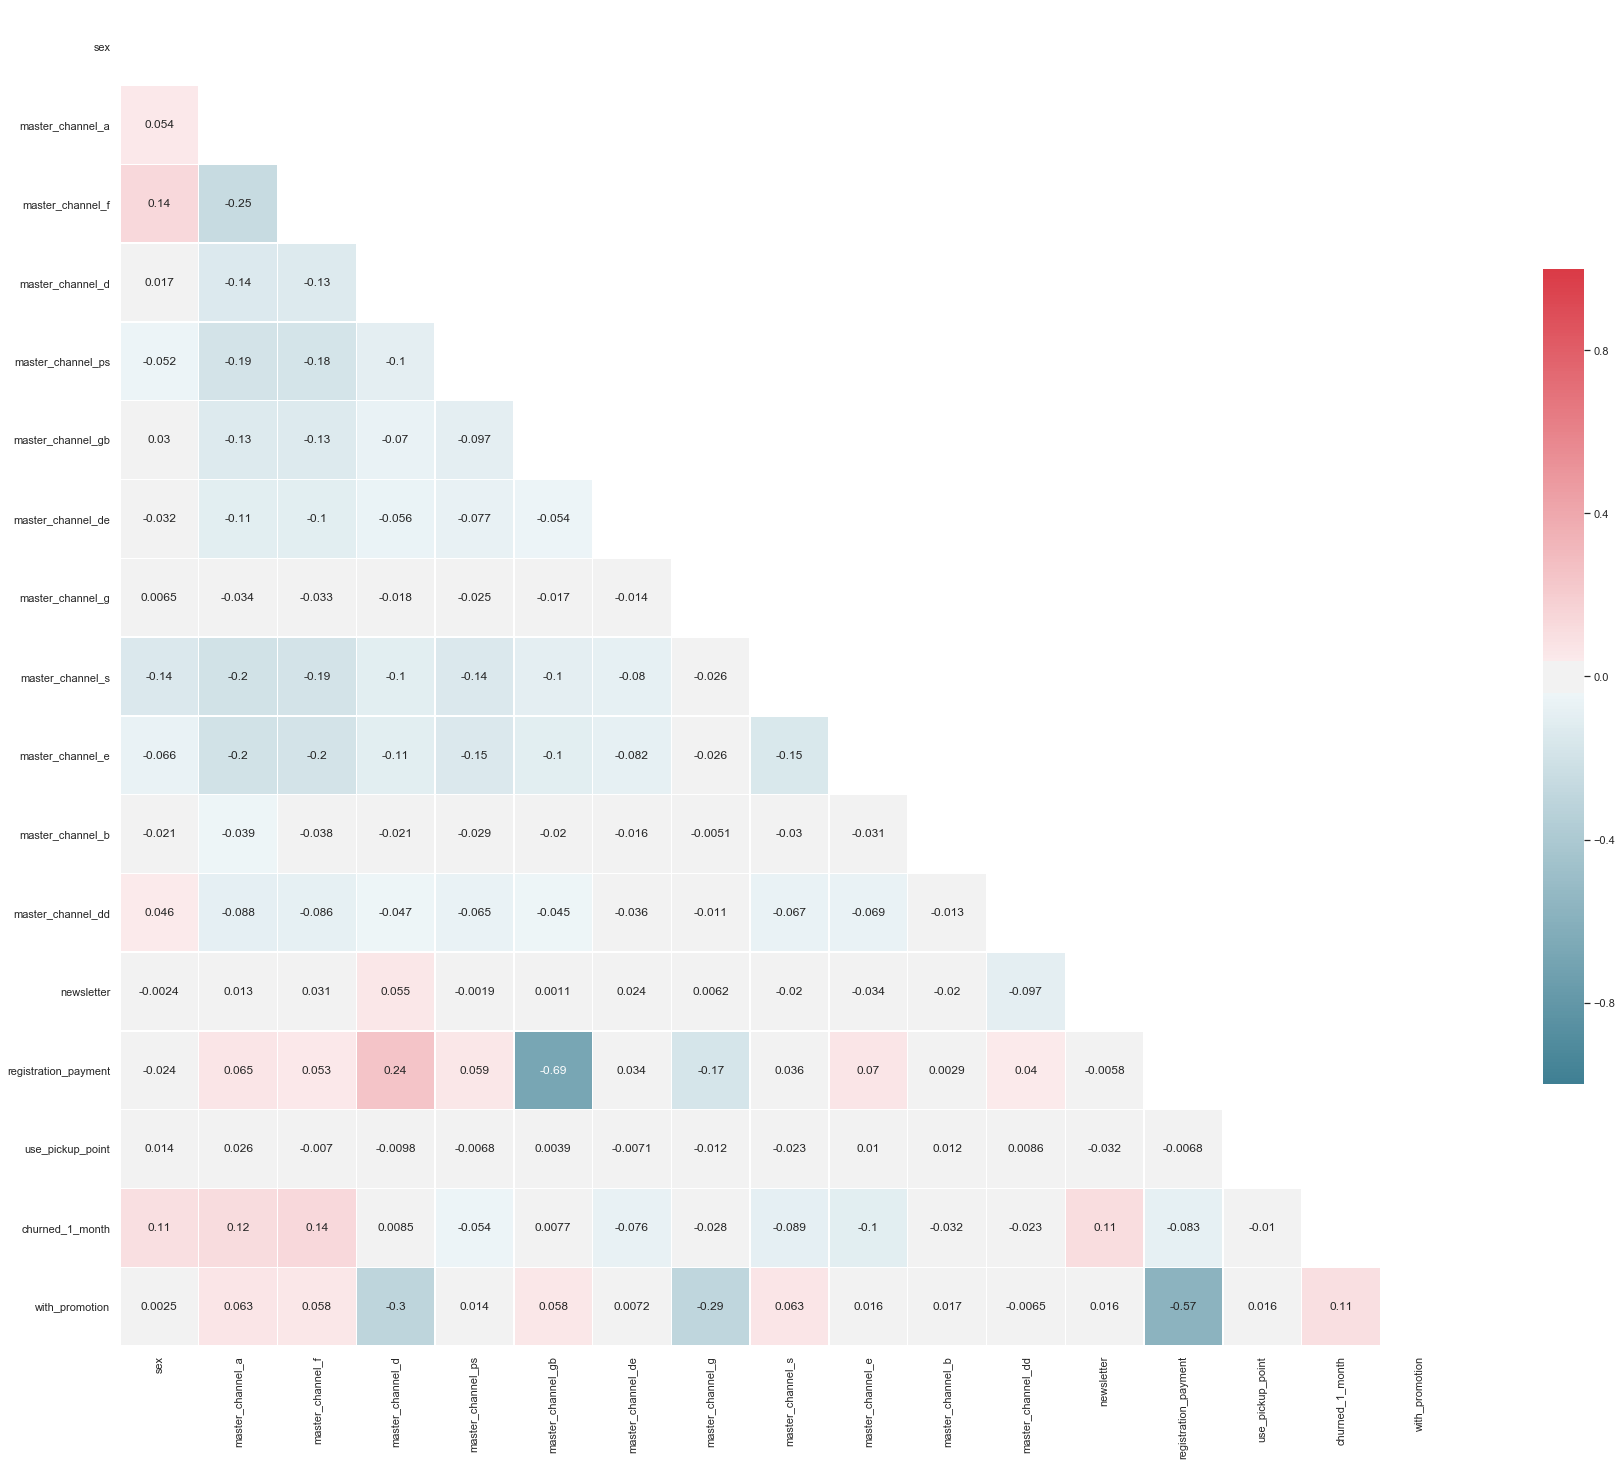

In [33]:
correlation_heatmap(df_encoded[col1])

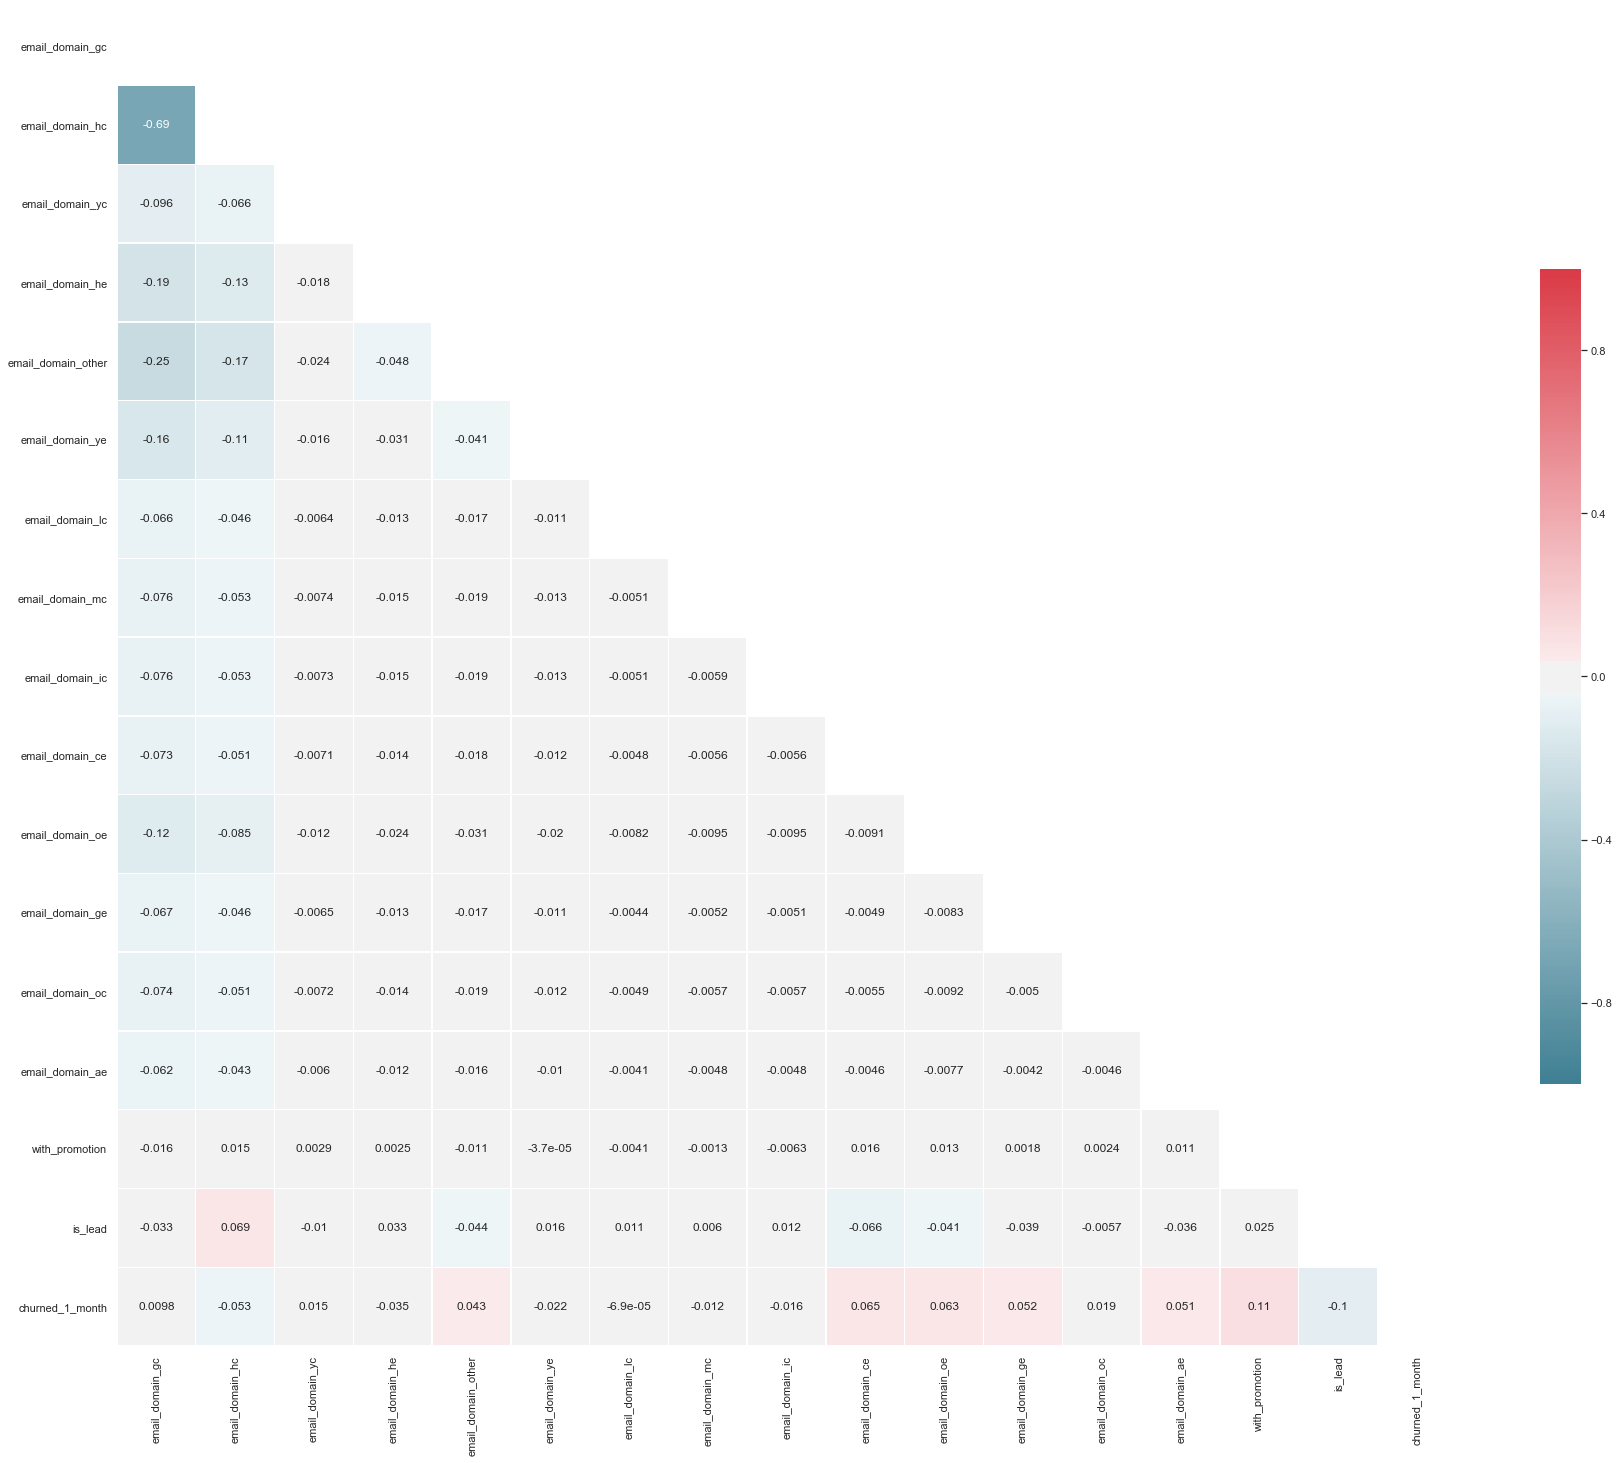

In [29]:
correlation_heatmap(df_encoded[col2])

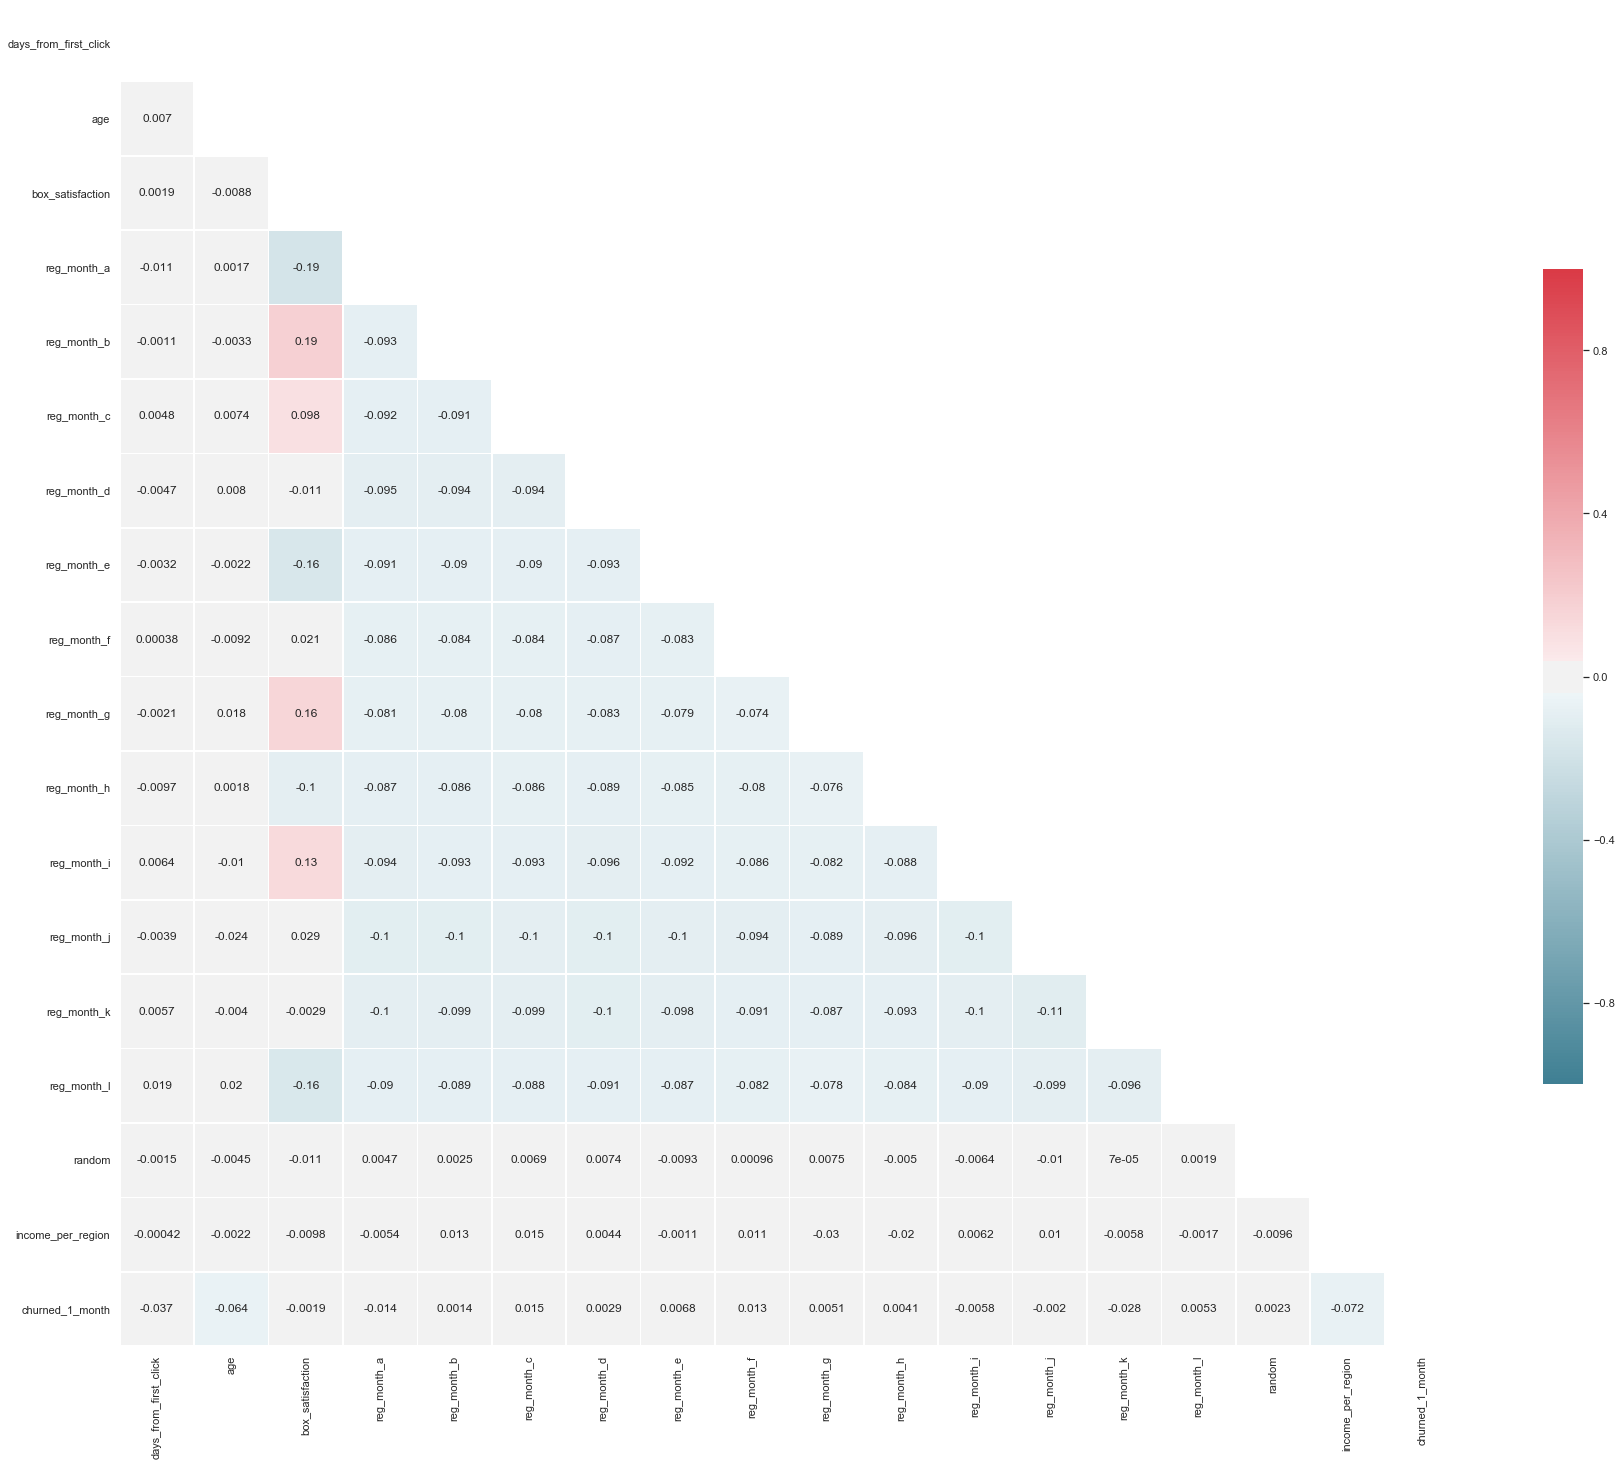

In [30]:
correlation_heatmap(df_encoded[col3].drop('reg_year', axis=1))

We can see from the correlation heatmaps that the highest correlation we have with our target feature is:

- master_channel_f (0.14)
- master_channel_a (0.12)
- sex (0.11)
- newsletter (0.11)
- with_promotion (0.11)
- is lead (0.1)

**Such low values state that there is almost no correlation between features and the churn**. It seems that customers are churning randomly and there is no big impact from the pricing, different channels, or other features. It might be that the first month is more of the test month for the customer and the decision to stay or leave doesn't really depend on anything. It's possible that later on when the customer had a chance to try multiple boxes and evaluate the service, more indicators would be found to explain the cancellations during later months.

# Exporting encoded dataset

In [35]:
# df_encoded.to_csv("../data/encoded_data.csv", index=True)